# **Credit Card Approval**

## **Objective**

The main objective of this project is to build the ML model to check worthiness of customer for credit card.

we have to build the model by various key features like demographic information ,annual income, property owership, education level and other revelent features.

The project also aims to identify the patterns that influence the target variable.

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
credit_card=pd.read_csv("/content/Credit_card.csv")

In [ ]:
credit_card_label=pd.read_csv("/content/Credit_card_label.csv")

In [ ]:
# Merge credit_card with credit_card_label based on 'Ind_ID'
credit_card = credit_card.merge(credit_card_label, on='Ind_ID', how='inner')

In [ ]:
credit_card.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2,1
2,5024916,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21832.0,365243,1,0,1,0,NaN,2,1
3,5024917,F,N,Y,0,NaN,Pensioner,Secondary / secondary special,Married,House / apartment,-21832.0,365243,1,0,1,0,NaN,2,1
4,5029311,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21876.0,365243,1,0,1,1,NaN,2,1


In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

We have total 19 features , 9 are int, 2-float,8-object data type. By this we need to do much part of encoding. I am drropping Ind_ID feature as its not importance or not relation with target variable.

In [ ]:
credit_card.drop(columns=['Ind_ID'], axis=1, inplace=True)

In [ ]:
# Top 5 rows
credit_card.head(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2,1
2,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21832.0,365243,1,0,1,0,NaN,2,1
3,F,N,Y,0,NaN,Pensioner,Secondary / secondary special,Married,House / apartment,-21832.0,365243,1,0,1,0,NaN,2,1
4,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21876.0,365243,1,0,1,1,NaN,2,1


** Birthday Count ** ==> It shows the age in another way, 0 means todays day

** Employed days ** ==> 0 means todays day, positive value indicates customer is unemployed

All other features are self explainable.

In [ ]:
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
CHILDREN,1548.0,0.412791,0.776691,0.0,0.0,0.0,1.00,14.0
Annual_income,1525.0,191399.326230,113252.997656,33750.0,121500.0,166500.0,225000.00,1575000.0
Birthday_count,1526.0,-16040.342071,4229.503202,-24946.0,-19553.0,-15661.5,-12417.00,-7705.0
Employed_days,1548.0,59364.689922,137808.062701,-14887.0,-3174.5,-1565.0,-431.75,365243.0
Mobile_phone,1548.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
Work_Phone,1548.0,0.208010,0.406015,0.0,0.0,0.0,0.00,1.0
Phone,1548.0,0.309432,0.462409,0.0,0.0,0.0,1.00,1.0
EMAIL_ID,1548.0,0.092377,0.289651,0.0,0.0,0.0,0.00,1.0
Family_Members,1548.0,2.161499,0.947772,1.0,2.0,2.0,3.00,15.0
label,1548.0,0.113049,0.316755,0.0,0.0,0.0,0.00,1.0


In the children column min is 0 and max is 14 also 75% is 1 ,so we can conclude that there are some outliers and we need to remove them for model building.

For the Annual_income and Birthday_count column we have some null values.



# **Checking For Missing Values**

In [ ]:
credit_card.isnull().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

From the above results we can see that missing values present in GENDER,Annual_Income,Birthday_count,Type_Occupation

In [ ]:
#checking percentage if missing values
credit_card.isnull().mean()*100

GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

In [ ]:
# Filling values in GENDER column by mode
credit_card['GENDER'].fillna(credit_card['GENDER'].mode()[0], inplace=True)

In [ ]:
# Filling values in Annual_income and Birthday_count column by mean
credit_card['Annual_income'].fillna(credit_card['Annual_income'].mean(), inplace=True)
credit_card['Birthday_count'].fillna(credit_card['Birthday_count'].mean(), inplace=True)

In [ ]:
# Filling missing values in Type_Occupation with new category UNKNOWN
credit_card['Type_Occupation'].fillna('UNKNOWN',inplace=True)

In [ ]:
credit_card.isnull().sum()

GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

# **Checking For Outliers**

In [ ]:
credit_card.skew()

<ipython-input-16-30b85b9f92ee>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_card.skew()


CHILDREN          4.631122
Annual_income     3.953991
Birthday_count   -0.172313
Employed_days     1.770964
Mobile_phone      0.000000
Work_Phone        1.440179
Phone             0.825309
EMAIL_ID          2.818216
Family_Members    2.232273
label             2.446379
dtype: float64

In [ ]:
# Seeing Unique Values
for column in credit_card.columns:
    unique_values = credit_card[column].nunique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in GENDER: 2
Unique values in Car_Owner: 2
Unique values in Propert_Owner: 2
Unique values in CHILDREN: 6
Unique values in Annual_income: 116
Unique values in Type_Income: 4
Unique values in EDUCATION: 5
Unique values in Marital_status: 5
Unique values in Housing_type: 6
Unique values in Birthday_count: 1271
Unique values in Employed_days: 956
Unique values in Mobile_phone: 1
Unique values in Work_Phone: 2
Unique values in Phone: 2
Unique values in EMAIL_ID: 2
Unique values in Type_Occupation: 19
Unique values in Family_Members: 7
Unique values in label: 2


From the above we can see that outliers can be in children,Annual_income,Employed_days,Family_members.

Birthday_count seems symmetric , we can see outliers if any , by Z-score.

For Other feature we calculate by IQR.

In [ ]:
# IQR
columns_of_interest = ['CHILDREN', 'Annual_income', 'Employed_days', 'Family_Members']

for column in columns_of_interest:
    Q1 = credit_card[column].quantile(0.25)
    Q3 = credit_card[column].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR

    outliers = credit_card[(credit_card[column] < low_limit) | (credit_card[column] > up_limit)][column].unique()

    print(f"\nColumn: {column}")
    print(f'Outliers in the dataset are: {outliers}')



Column: CHILDREN
Outliers in the dataset are: [ 3 14  4]

Column: Annual_income
Outliers in the dataset are: [ 450000.  594000.  630000.  418500.  540000.  495000.  405000.  391500.
  382500.  387000.  675000.  585000.  472500.  900000.  787500.  445500.
 1575000.  427500.  423000.  810000.  612000.]

Column: Employed_days
Outliers in the dataset are: [365243  -7310  -7341  -7346  -7364  -7369  -7400  -7413  -7494  -7553
  -7557  -7591  -7614  -7640  -7676  -7718  -7804  -7979  -8033  -8036
  -8044  -8157  -8161  -8172  -8230  -8290  -8369  -8375  -8377  -8405
  -8479  -8684  -8737  -8760  -8966  -9258  -9359  -9363  -9422  -9447
  -9683  -9698  -9870  -9925  -9975 -10364 -10600 -10688 -10758 -10762
 -11389 -11448 -11451 -11542 -11884 -11906 -11940 -12332 -12621 -12870
 -13010 -13382 -13735 -14887]

Column: Family_Members
Outliers in the dataset are: [ 5 15  6]


From the above box plot we can clearly see that the outliers are 3,4,14

# **Visualizing Outliers**

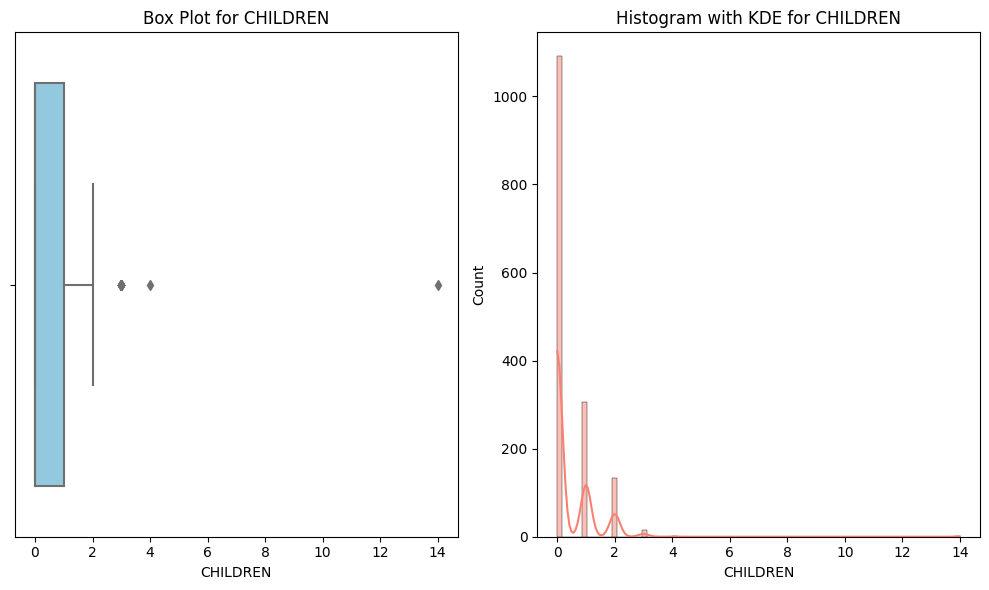

In [ ]:
# for Children
column_of_interest = 'CHILDREN'

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=credit_card[column_of_interest], color='skyblue')
plt.title(f'Box Plot for {column_of_interest}')

# Create a histogram with KDE
plt.subplot(1, 2, 2)
sns.histplot(credit_card[column_of_interest], kde=True, color='salmon')
plt.title(f'Histogram with KDE for {column_of_interest}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

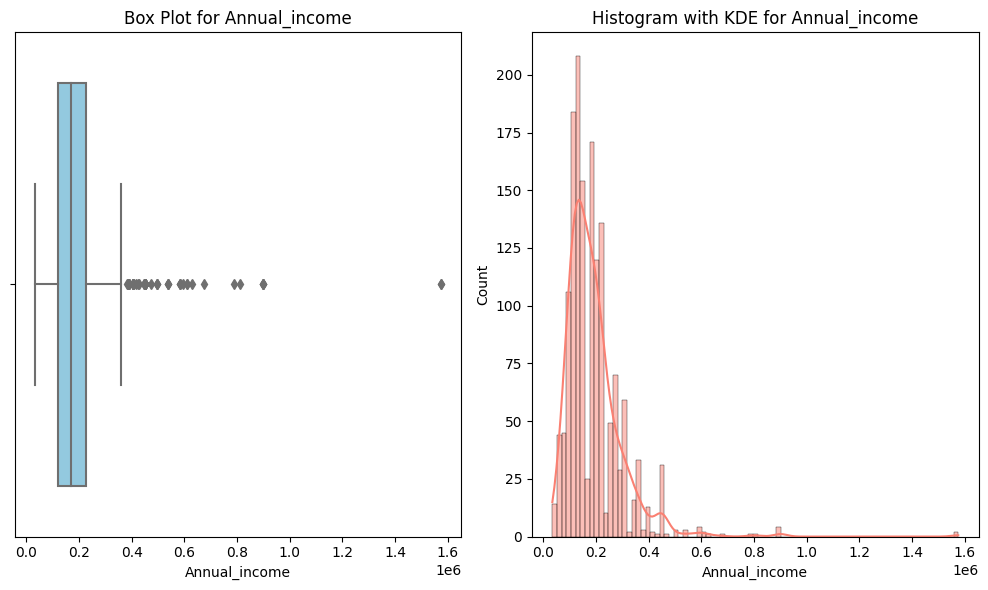

In [ ]:
# for Annual_income
column_of_interest = 'Annual_income'

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=credit_card[column_of_interest], color='skyblue')
plt.title(f'Box Plot for {column_of_interest}')

# Create a histogram with KDE
plt.subplot(1, 2, 2)
sns.histplot(credit_card[column_of_interest], kde=True, color='salmon')
plt.title(f'Histogram with KDE for {column_of_interest}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


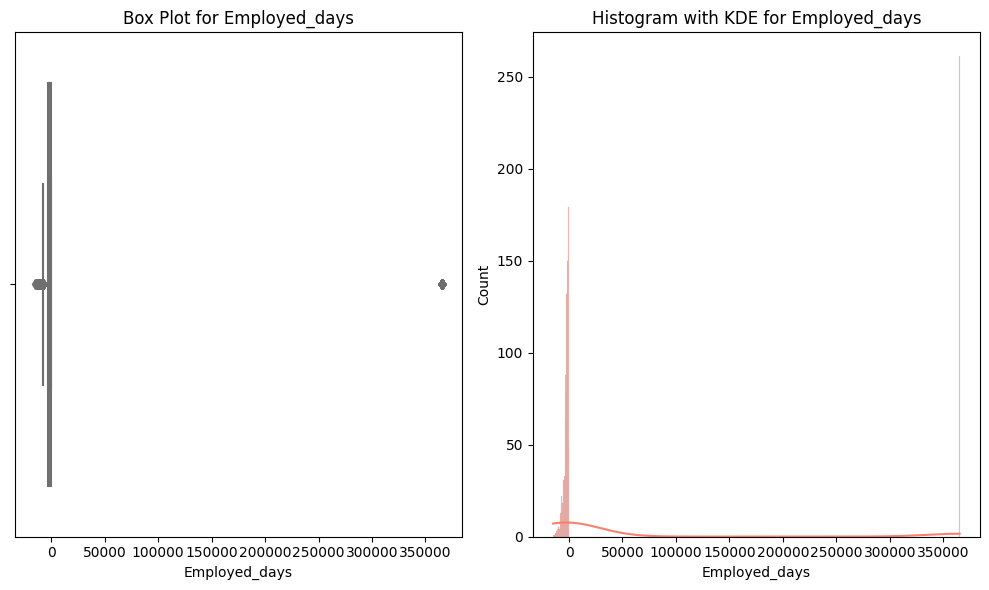

In [ ]:
# For Employed_days
column_of_interest = 'Employed_days'

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=credit_card[column_of_interest], color='skyblue')
plt.title(f'Box Plot for {column_of_interest}')

# Create a histogram with KDE
plt.subplot(1, 2, 2)
sns.histplot(credit_card[column_of_interest], kde=True, color='salmon')
plt.title(f'Histogram with KDE for {column_of_interest}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

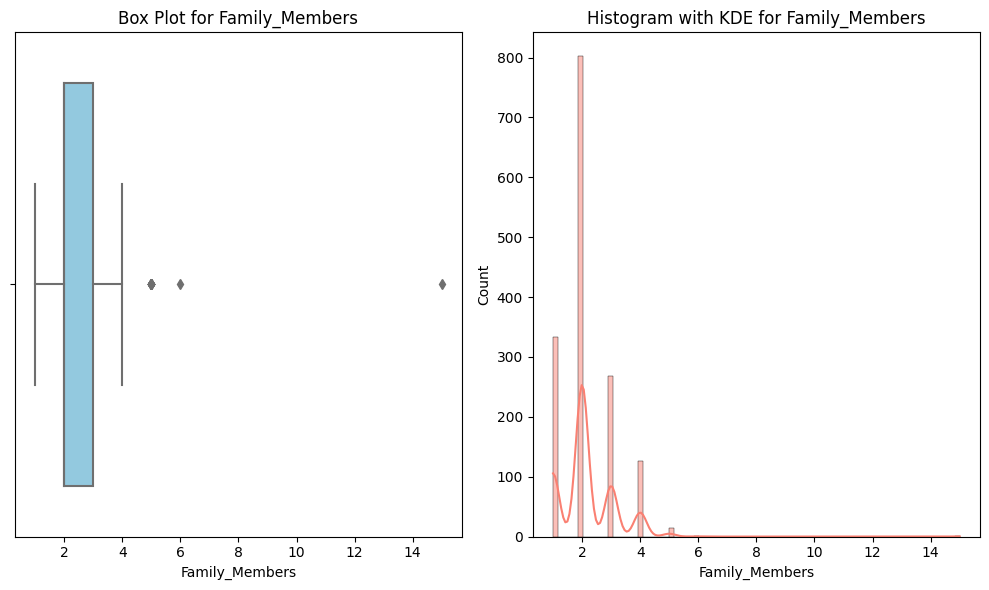

In [ ]:
# For Family members
column_of_interest = 'Family_Members'

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=credit_card[column_of_interest], color='skyblue')
plt.title(f'Box Plot for {column_of_interest}')

# Create a histogram with KDE
plt.subplot(1, 2, 2)
sns.histplot(credit_card[column_of_interest], kde=True, color='salmon')
plt.title(f'Histogram with KDE for {column_of_interest}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# **Handling Outliers**

We use capping for Children and Family_members column

We use log transformation for Annual_income

and we use sqrt transformation for Employed_days as some negative values in outlier

In [ ]:
capping_values = {'CHILDREN': 2, 'Family_Members': 4}

credit_card['CHILDREN'] = credit_card['CHILDREN'].apply(lambda x: capping_values['CHILDREN'] if x > capping_values['CHILDREN'] else x)

# Capping for 'Family_Members'
credit_card['Family_Members'] = credit_card['Family_Members'].apply(lambda x: capping_values['Family_Members'] if x > capping_values['Family_Members'] else x)

In [ ]:
credit_card['Annual_income'] = np.log1p(credit_card['Annual_income'])

<Axes: xlabel='Annual_income', ylabel='Count'>

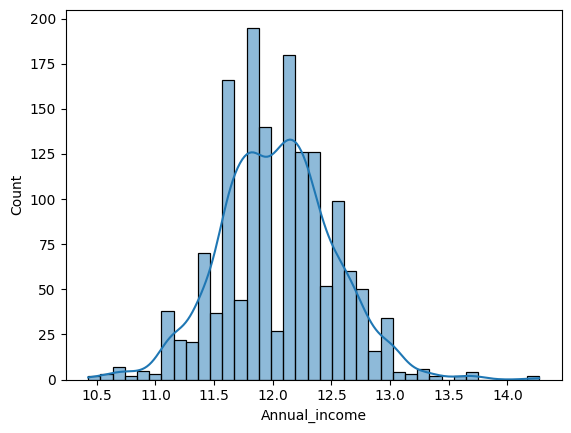

In [ ]:
# we are checking distibution of column

sns.histplot(data=credit_card['Annual_income'], kde = True)

Seems Symmetric so we we are again finding outliers by Z score

In [ ]:
from scipy.stats import zscore
z_scores = zscore(credit_card['Annual_income'])

threshold = 3

outlier_values = credit_card.loc[(zscore(credit_card['Annual_income']) > 3) | (zscore(credit_card['Annual_income']) < -3), 'Annual_income'].values
print(outlier_values)



[10.54009084 10.42676533 13.71015115 13.71015115 10.49130199 13.57661992
 14.26976647 14.26976647 13.71015115 13.60479076 13.71015115]


its better to drop them as they dont create any bias

In [ ]:
# Identify the indices of the outliers
outlier_indices = (z_scores > threshold) | (z_scores < -threshold)

# Drop the rows with outliers from the DataFrame
credit_card.drop(credit_card.index[outlier_indices], inplace=True)

In [ ]:
from scipy.stats import zscore
z_scores = zscore(credit_card['Birthday_count'])

threshold = 3

outlier_values = credit_card.loc[(zscore(credit_card['Birthday_count']) > 3) | (zscore(credit_card['Birthday_count']) < -3), 'Birthday_count'].values
print(outlier_values)

[]


we are getting no outliers. we good to go

In [ ]:
# We are dropping employed days column as it has so may outliers so it will create biasness
credit_card.drop('Employed_days', axis=1, inplace=True)

**We are done with outliers**

# **EDA**

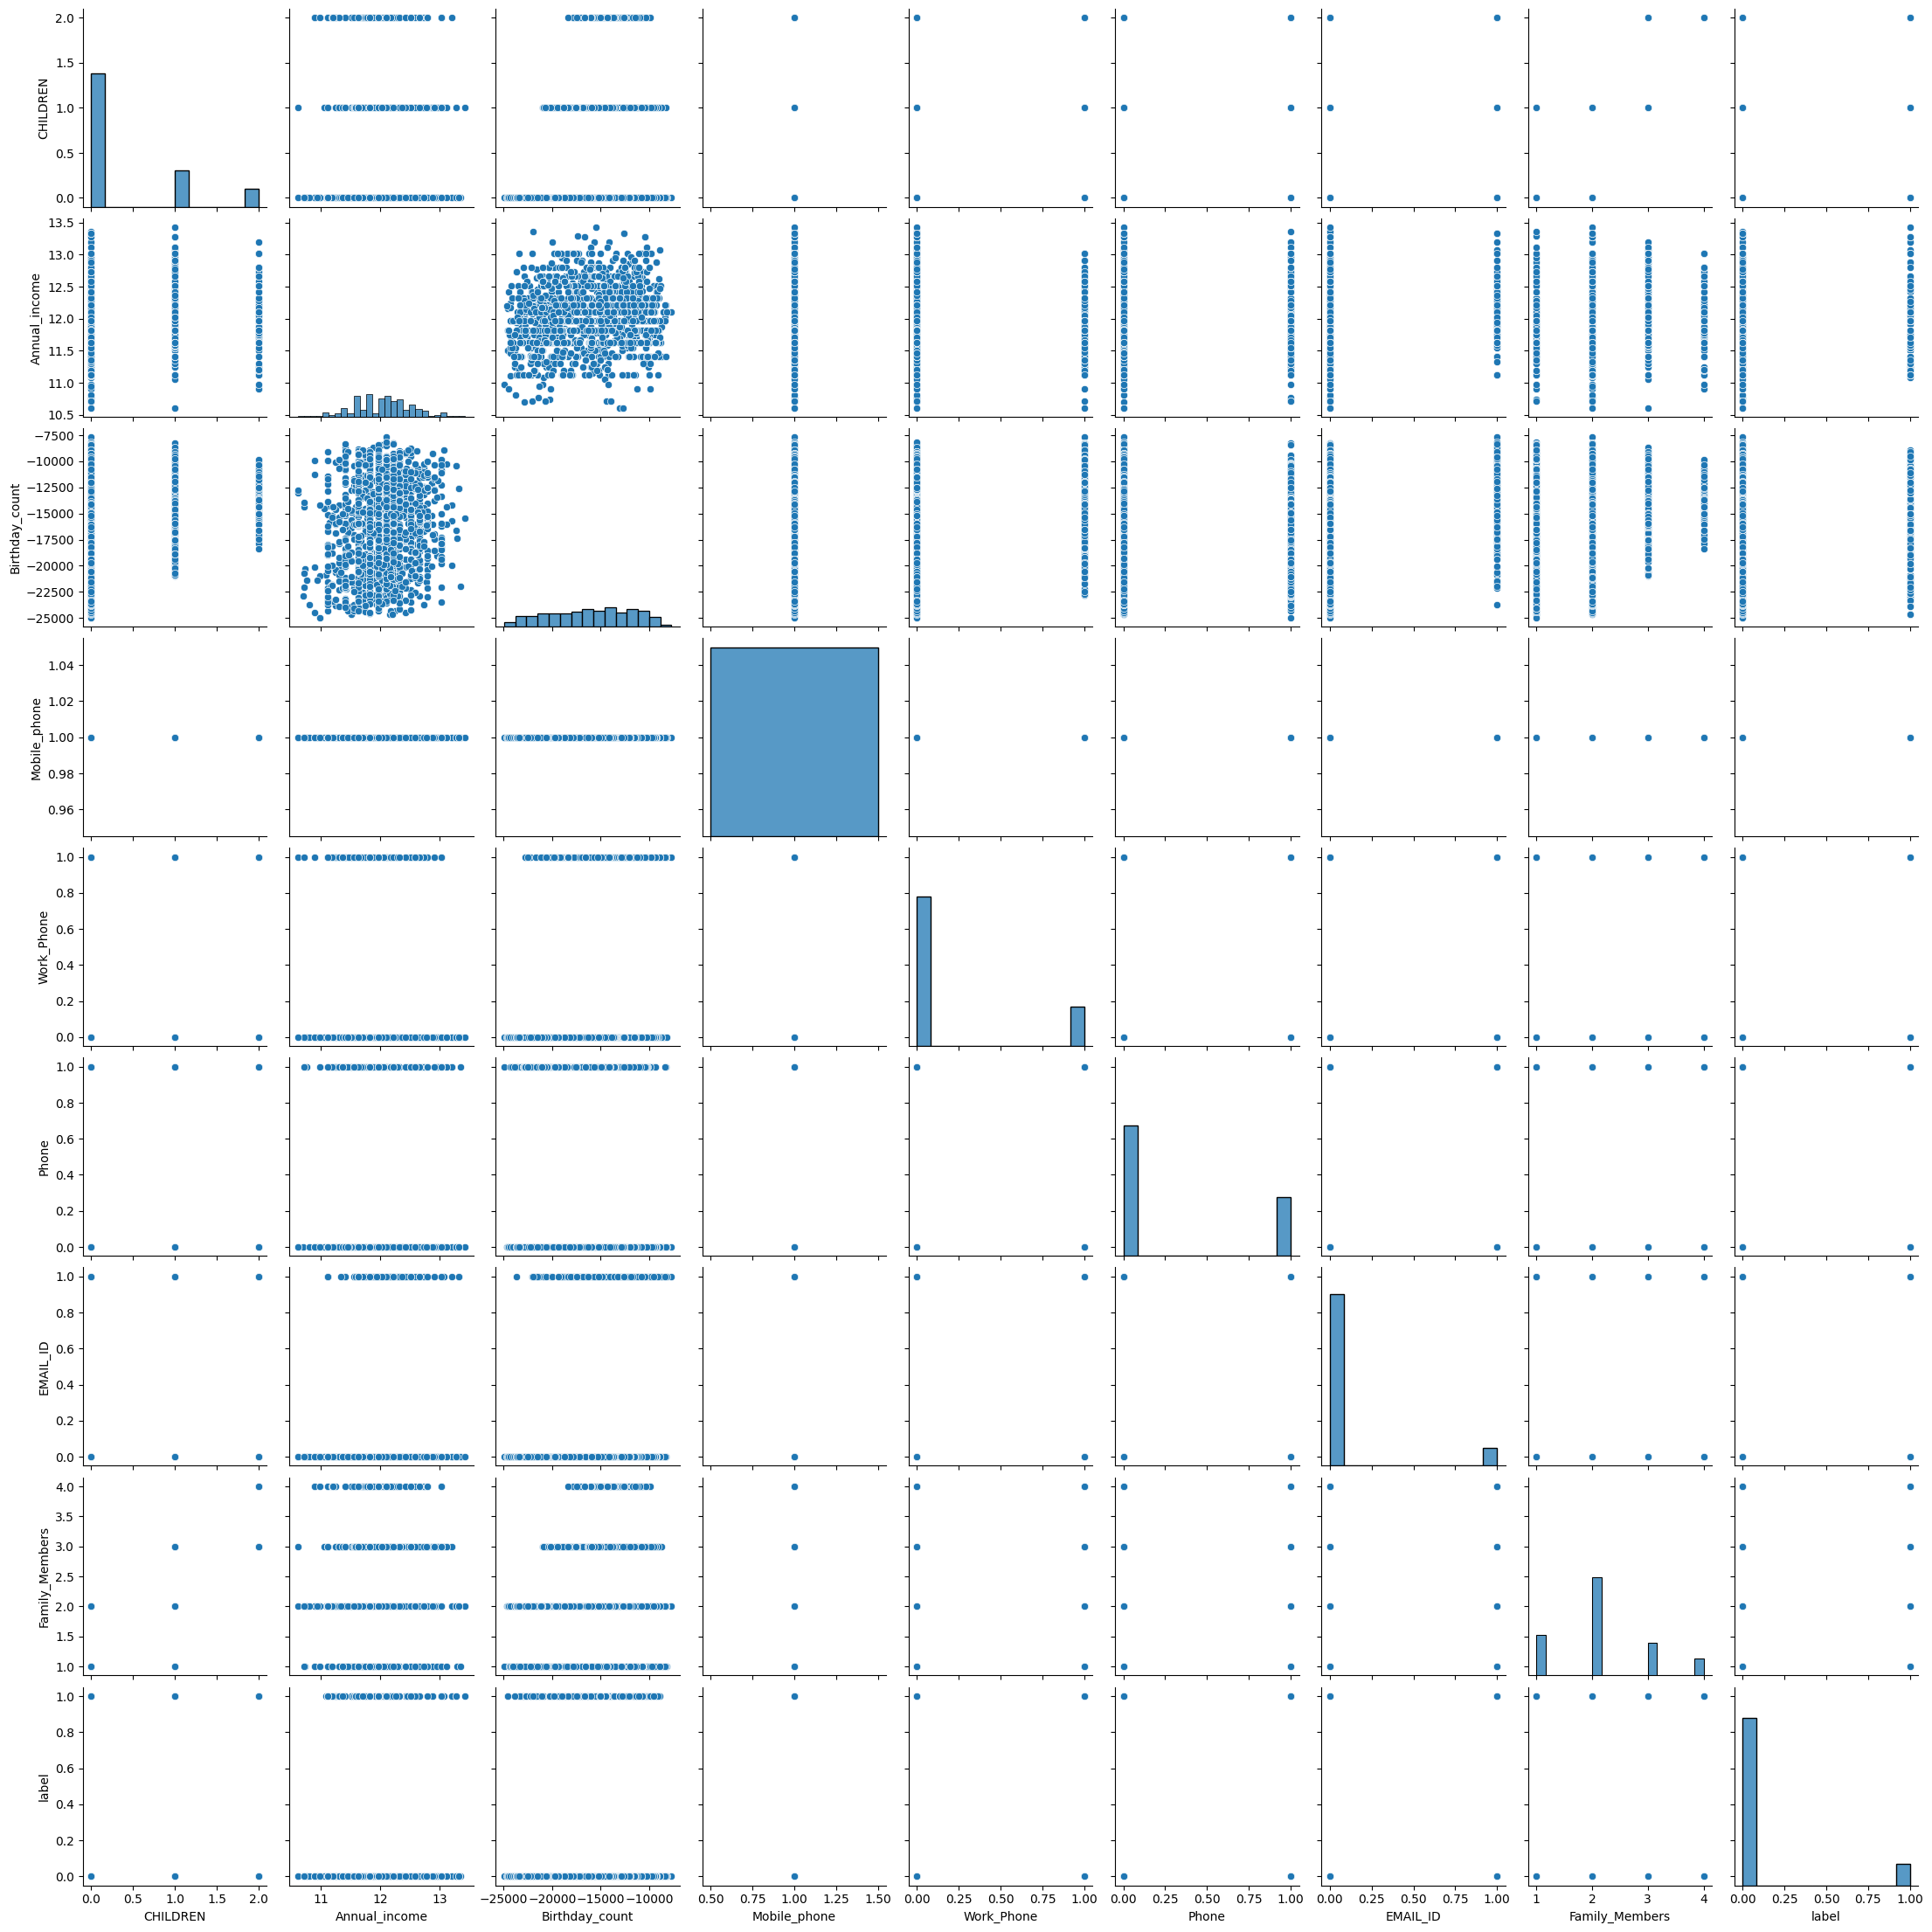

In [ ]:
sns.pairplot(data=credit_card)

In [ ]:
credit_card.corr()

<ipython-input-31-61016a48a11c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_card.corr()


,CHILDREN,Annual_income,Birthday_count,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
CHILDREN,1.000000,0.058132,0.319825,NaN,0.048508,0.004998,0.040516,0.867273,-0.018627
Annual_income,0.058132,1.000000,0.121106,NaN,-0.065121,-0.002086,0.131199,0.040065,0.029243
Birthday_count,0.319825,0.121106,1.000000,NaN,0.175650,-0.027779,0.169609,0.286829,-0.043644
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.048508,-0.065121,0.175650,NaN,1.000000,0.351801,-0.009656,0.086758,-0.008367
Phone,0.004998,-0.002086,-0.027779,NaN,0.351801,1.000000,0.018632,0.014848,-0.001877
EMAIL_ID,0.040516,0.131199,0.169609,NaN,-0.009656,0.018632,1.000000,0.045575,0.012960
Family_Members,0.867273,0.040065,0.286829,NaN,0.086758,0.014848,0.045575,1.000000,-0.028960
label,-0.018627,0.029243,-0.043644,NaN,-0.008367,-0.001877,0.012960,-0.028960,1.000000


we can observe that children and family members are highely co relative. hence we consider to dropping one of them column

In [ ]:
credit_card.drop('CHILDREN', axis=1, inplace=True)

### **Encoding Categorical Variables**

In [ ]:
credit_card.head(5)

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,12.100718,Pensioner,Higher education,Married,House / apartment,-18772.0,1,0,0,0,UNKNOWN,2,1
1,F,N,N,12.100718,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,1,0,0,0,UNKNOWN,2,1
2,F,N,Y,11.630717,Pensioner,Secondary / secondary special,Married,House / apartment,-21832.0,1,0,1,0,UNKNOWN,2,1
3,F,N,Y,12.162122,Pensioner,Secondary / secondary special,Married,House / apartment,-21832.0,1,0,1,0,UNKNOWN,2,1
4,F,N,Y,11.630717,Pensioner,Secondary / secondary special,Married,House / apartment,-21876.0,1,0,1,1,UNKNOWN,2,1


In [ ]:
categ_cols = ['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type']

for col in categ_cols:
    unique_values = credit_card[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'GENDER': ['M' 'F']
Unique values in 'Car_Owner': ['Y' 'N']
Unique values in 'Propert_Owner': ['Y' 'N']
Unique values in 'Type_Income': ['Pensioner' 'Commercial associate' 'Working' 'State servant']
Unique values in 'EDUCATION': ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Unique values in 'Marital_status': ['Married' 'Single / not married' 'Separated' 'Widow' 'Civil marriage']
Unique values in 'Housing_type': ['House / apartment' 'Municipal apartment' 'Rented apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in ['GENDER', 'Car_Owner', 'Propert_Owner']:
    credit_card[col] = label_encoder.fit_transform(credit_card[col])

In [ ]:
categorical_cols = ['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type']

# Apply One-Hot Encoding to the specified columns
credit_card = pd.get_dummies(credit_card, columns=categorical_cols, prefix=categorical_cols)

In [ ]:
remai_cols = ['Type_Occupation']

# Apply One-Hot Encoding to the specified columns
credit_card = pd.get_dummies(credit_card, columns=remai_cols, prefix=remai_cols)

In [ ]:
credit_card.head(5)

,GENDER,Car_Owner,Propert_Owner,Annual_income,Birthday_count,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_UNKNOWN,Type_Occupation_Waiters/barmen staff
0,1,1,1,12.100718,-18772.0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,12.100718,-22134.0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,11.630717,-21832.0,1,0,1,0,2,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,12.162122,-21832.0,1,0,1,0,2,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,11.630717,-21876.0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = credit_card.drop(columns=['label'])
y = credit_card['label']

In [ ]:
X.head(5)

,GENDER,Car_Owner,Propert_Owner,Annual_income,Birthday_count,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_UNKNOWN,Type_Occupation_Waiters/barmen staff
0,1,1,1,12.100718,-18772.0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,12.100718,-22134.0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,11.630717,-21832.0,1,0,1,0,2,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,12.162122,-21832.0,1,0,1,0,2,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,11.630717,-21876.0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

# **Normalization**

In [ ]:
# Train Test split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# apply Min-Max Normalization

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

**Logistic Regression**

In [ ]:
# Training model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Creating a logistic regression model
model = LogisticRegression(random_state=42)

# Training the model
model.fit(X_train_normalized, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Making predictions on the normalized testing set
y_pred = model.predict(X_test_normalized)

In [ ]:
# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Training the model
rf_model.fit(X_train_normalized, y_train)

# Making predictions on the normalized testing set
rf_y_pred = rf_model.predict(X_test_normalized)

# Evaluate the model performance
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.93


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train_normalized, y_train)

# Make predictions on the normalized testing set
dt_y_pred = dt_model.predict(X_test_normalized)

# Evaluate the Decision Tree model's performance
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")




Decision Tree Accuracy: 0.86


**Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM model
svm_model = SVC(random_state=42)

# Train the SVM model
svm_model.fit(X_train_normalized, y_train)

# Make predictions on the normalized testing set
svm_y_pred = svm_model.predict(X_test_normalized)

# Evaluate the SVM model's performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")




SVM Accuracy: 0.88
